In [70]:
import config
from lib import data

In [26]:
import numpy as np
from matplotlib import pyplot as plt
import pyatmosphere as pyatm

In [23]:
channel = pyatm.Channel(
  grid=pyatm.RectGrid(resolution=2**9, delta=0.0004),
  source=pyatm.GaussianSource(
      wvl=809e-9,
      w0=0.02,
      F0=1.6e3
  ),
  path=pyatm.IdenticalPhaseScreensPath(
    phase_screen=pyatm.SSPhaseScreen(
      model=pyatm.MVKModel(
        Cn2=1.5e-14,
        l0=1e-3,
        L0=1e3,
      ),
      f_grid=pyatm.RandLogPolarGrid(
        points=2**10,
        f_min=1 / 1e3 / 15,
        f_max=1 / 1e-3 * 2
      )
    ),
    length=1.6e3,
    count=10
  ),
  pupil=pyatm.CirclePupil(
    radius=0.04
  ),
)

In [24]:
from matplotlib.colors import LinearSegmentedColormap
from pyatmosphere.measures import I, mean_x, mean_y, mean_x2

c_1 = 0
c_2 = 153
cdict1 = {
  'red':   ((0.0, 0.0, 1), (0.015, 1.0, 252/256), (0.7, c_1/256, c_1/256), (1.0, c_1/256, 0.0)),
  'green': ((0.0, 0.0, 1), (0.015, 1.0, 254/256), (0.7, c_2/256, c_2/256), (1.0, c_2/256, 0.0)),
  'blue':  ((0.0, 0.0, 1), (0.015, 1.0, 1.),                                (1.0, 1.0, 1.0)),
}
ph_red = LinearSegmentedColormap('phRed', cdict1)

In [52]:

plt.rcParams['axes.axisbelow'] = True
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.serif"] = "STIX"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [ ]:
while True:
    print('s')
    beam_shape = channel.run(pupil=False)
    x0, y0 = mean_x(channel, output=beam_shape), mean_y(channel, output=beam_shape)
    r0 = np.sqrt(x0**2 + y0**2)
    x2 = mean_x2(channel, output=beam_shape)
    st = np.sqrt(4 * (x2 - x0**2))
    #if r0 > 1.3 * st / 2 and 1/6 < y0 / r0 < 5/6 and 1/6 < x0 / r0 < 5/6:
    if r0 > 1.3 * st / 2 and 1/6 < y0 / r0 and 1/6 < x0 / r0:
        break

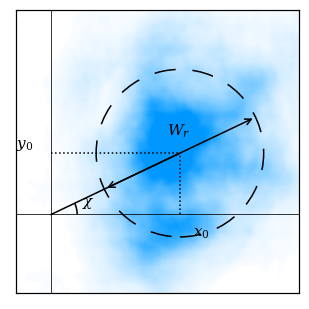

In [71]:
from matplotlib.patches import Arc

plt.figure(dpi=110, figsize=(3.4, 3.4))
plt.imshow(
  I(channel, output=beam_shape), 
  cmap=ph_red, 
  vmin=0, vmax=1100, 
  extent=channel.grid.extent
)
plt.plot([0, x0], [0, y0], lw=1, c='k')
plt.plot([0, x0], [y0, y0], lw=1, c='k', ls=':')
plt.plot([x0, x0], [0, y0], lw=1, c='k', ls=':')
circle1 = plt.Circle((x0, y0), st/2, color='k', ls=(0, (14,11)), fill=False, zorder=10)
plt.gca().add_patch(circle1)

angle = Arc((0, 0), 0.012, 0.012, angle=0, theta1=0.0, theta2=np.arcsin(y0/r0) / 2 / np.pi * 360 )
plt.gca().add_patch(angle)
plt.annotate("", xy=(x0 - st/2*x0/r0, y0 - st/2*y0/r0), xytext=(x0 + st/2*x0/r0, y0 + st/2*y0/r0), arrowprops=dict(arrowstyle="<->"))

plt.annotate("$W_r$", xy=(x0*0.9, y0*1.3), c='k')
plt.annotate("$y_0$", xy=(-0.008, y0*1.1), c='k')
plt.annotate("$x_0$", xy=(x0*1.1, -0.005), c='k')
plt.annotate("$\chi$", xy=(0.007, 0.002), c='k')

plt.axhline(0,color='k', lw=0.5)
plt.axvline(0,color='k', lw=0.5) 
plt.xticks([]);
plt.yticks([]);
plt.xlim(-0.008, 0.057)
plt.ylim(-0.018, 0.047)
plt.savefig(config.PLOTS_PATH / ('beam_profile.pdf'), **{
    "format": "pdf",
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.005
    }
)